In [2]:
from numpy import *
from matplotlib.pyplot import *

In [3]:
def control(t, y):
#   control policy goes here
    ux = -sin(t)
    uy = cos(t)
    return array([ux, uy])

def control2(t, y):
    ux = 1 #move on x axis 1 unit at each step
    uy = 2 #move on y axis 2 units at each step
    return array([ux, uy])

In [4]:
def simulate(Δt, x, u):
    x += Δt * u  #Euler integration
    return x

In [5]:
def sense(x):
#   A perfect sensor where y(t) = p(t)
    return x

In [13]:
# Simulator for circle trajectory:

tf = 10. #final time
Δt = 0.1 #time step
time = linspace(0, tf, int(tf / Δt) + 1) #time interval


x = array([0.,0.])  #initial condition 
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t,y)
    x = simulate(Δt, x, u)  #simulate by integration
    x_log.append(copy(x))

x_log = array(x_log)

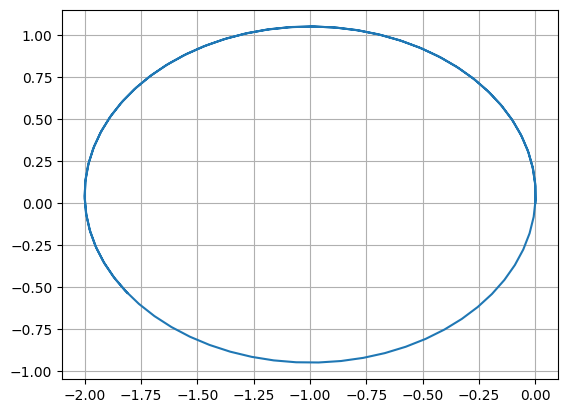

In [7]:
grid()
plot(x_log[:,0], x_log[:,1])

In [8]:
# Simulator 2 for line trajectory:

tf = 10. #final time
Δt = 0.1 #time step
time = linspace(0, tf, int(tf / Δt) + 1) #time interval


x = array([0.,0.])  #initial condition 
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control2(t,y)
    x = simulate(Δt, x, u)  #simulate by integration
    x_log.append(copy(x))

x_log = array(x_log)

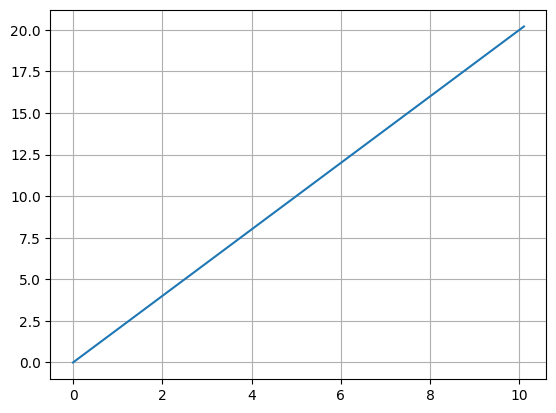

In [9]:
grid()
plot(x_log[:,0], x_log[:,1])

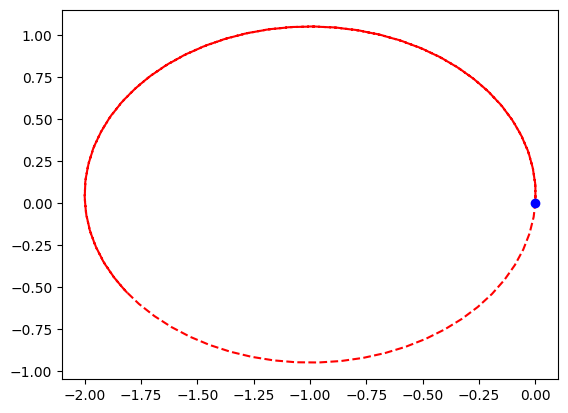

In [14]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    

fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    
anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())